# F1 Podium Prediction

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder

## Initializing Dataset

In [26]:
dfStartingPos = pd.read_csv("assets/f1db-races-starting-grid-positions.csv")
dfRaceResults = pd.read_csv("assets/f1db-races-race-results.csv")
dfDriver = pd.read_csv("assets/f1db-drivers.csv")
dfFp1 = pd.read_csv("assets/f1db-races-free-practice-1-results.csv")
dfFp2 = pd.read_csv("assets/f1db-races-free-practice-2-results.csv")
dfFp3 = pd.read_csv("assets/f1db-races-free-practice-3-results.csv")
dfRaces = pd.read_csv("assets/f1db-races.csv")

C:\Users\Molina\AppData\Local\Temp\ipykernel_20852\2880382200.py:2: DtypeWarning: Columns (30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  dfRaceResults = pd.read_csv("assets/f1db-races-race-results.csv")


Dropping other columns for simplicity.  
Columns for dfStartingPos:
- positionDisplayOrder
- driverId  

Columns for dfRaceResults: 
- raceId 
- positionDisplayOrder  
- driverId  

Columns for dfFp1,dfFp2,dfFp3:  
- positionDisplayOrder
- driverId  

Columns for dfDriver:  
- id
- name
- totalPodiums
- totalPolePositions

Columns for dfRaces:
- id
- year

In [27]:
col1 = ['raceId','positionDisplayOrder','driverId']
dfStartingPos = dfStartingPos[col1]
dfRaceResults = dfRaceResults[col1]
dfFp1 = dfFp1[col1]
dfFp2 = dfFp2[col1]
dfFp3 = dfFp3[col1]
dfDriver = dfDriver[['id','name','totalPodiums','totalPolePositions']]
dfRaces = dfRaces[['id','year','grandPrixId']]

In [28]:
dfStartingPos.rename(columns={"positionDisplayOrder":'startingPos'},inplace=True)
dfRaceResults.rename(columns={"positionDisplayOrder":'finishPos'},inplace=True)
dfFp1.rename(columns={"positionDisplayOrder":"fp1Pos"},inplace=True)
dfFp2.rename(columns={"positionDisplayOrder":"fp2Pos"},inplace=True)
dfFp3.rename(columns={"positionDisplayOrder":"fp3Pos"},inplace=True)
dfDriver.rename(columns={"id":'driverId'},inplace=True)
dfRaces.rename(columns={"id":"raceId"},inplace=True)

In [29]:
print(dfStartingPos.shape)
print(dfRaceResults.shape)
print(dfFp1.shape)
print(dfFp2.shape)
print(dfFp3.shape)
print(dfDriver.shape)
print(dfRaces.shape)

(25008, 3)
(26771, 3)
(15316, 3)
(14979, 3)
(8290, 3)
(903, 4)
(1125, 3)


In [50]:
mergedRace = pd.merge(dfRaceResults,dfStartingPos,on=['raceId','driverId'],how='left')
mergedFp1 = pd.merge(mergedRace,dfFp1,on=['raceId','driverId'],how='left')
mergedFp2 = pd.merge(mergedFp1, dfFp2,on=['raceId','driverId'],how='left')
mergedFp3 = pd.merge(mergedFp2,dfFp3,on=['raceId','driverId'],how='left')


In [51]:
mergedFp3

,raceId,finishPos,driverId,startingPos,fp1Pos,fp2Pos,fp3Pos
0,1,1,nino-farina,1.0,NaN,NaN,NaN
1,1,2,luigi-fagioli,2.0,NaN,NaN,NaN
2,1,3,reg-parnell,4.0,NaN,NaN,NaN
3,1,4,yves-giraud-cabantous,6.0,NaN,NaN,NaN
4,1,5,louis-rosier,9.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
26766,1123,16,liam-lawson,14.0,20.0,15.0,18.0
26767,1123,17,esteban-ocon,11.0,14.0,12.0,14.0
26768,1123,18,valtteri-bottas,19.0,16.0,11.0,17.0
26769,1123,19,alexander-albon,17.0,13.0,20.0,7.0


In [52]:
print(mergedFp3)
print(mergedFp3.isnull().sum())

       raceId  finishPos               driverId  startingPos  fp1Pos  fp2Pos  \
0           1          1            nino-farina          1.0     NaN     NaN   
1           1          2          luigi-fagioli          2.0     NaN     NaN   
2           1          3            reg-parnell          4.0     NaN     NaN   
3           1          4  yves-giraud-cabantous          6.0     NaN     NaN   
4           1          5           louis-rosier          9.0     NaN     NaN   
...       ...        ...                    ...          ...     ...     ...   
26766    1123         16            liam-lawson         14.0    20.0    15.0   
26767    1123         17           esteban-ocon         11.0    14.0    12.0   
26768    1123         18        valtteri-bottas         19.0    16.0    11.0   
26769    1123         19        alexander-albon         17.0    13.0    20.0   
26770    1123         20           pierre-gasly          3.0     9.0     6.0   

       fp3Pos  
0         NaN  
1      

In [75]:
mergedDriver = pd.merge(mergedFp3,dfDriver, on=['driverId'],how='inner')
df = pd.merge(mergedDriver,dfRaces,on=['raceId'],how='inner')

In [76]:
df.dropna(inplace=True)

In [77]:
df.isnull().sum()

raceId                0
finishPos             0
driverId              0
startingPos           0
fp1Pos                0
fp2Pos                0
fp3Pos                0
name                  0
totalPodiums          0
totalPolePositions    0
year                  0
grandPrixId           0
dtype: int64

In [78]:
df['podiumFinish'] = df['finishPos'].apply(lambda x: 1 if x<=3 else 0)

In [79]:
df

,raceId,finishPos,driverId,startingPos,fp1Pos,fp2Pos,fp3Pos,name,totalPodiums,totalPolePositions,year,grandPrixId,podiumFinish
18001,706,1,ralf-schumacher,3.0,8.0,7.0,1.0,Ralf Schumacher,27,6,2003,europe,1
18002,706,2,juan-pablo-montoya,4.0,11.0,4.0,2.0,Juan Pablo Montoya,30,13,2003,europe,1
18003,706,3,rubens-barrichello,5.0,12.0,2.0,10.0,Rubens Barrichello,68,14,2003,europe,1
18004,706,4,fernando-alonso,8.0,5.0,12.0,8.0,Fernando Alonso,106,22,2003,europe,0
18005,706,5,michael-schumacher,2.0,10.0,6.0,9.0,Michael Schumacher,155,68,2003,europe,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26766,1123,16,liam-lawson,14.0,20.0,15.0,18.0,Liam Lawson,0,0,2024,las-vegas,0
26767,1123,17,esteban-ocon,11.0,14.0,12.0,14.0,Esteban Ocon,4,0,2024,las-vegas,0
26768,1123,18,valtteri-bottas,19.0,16.0,11.0,17.0,Valtteri Bottas,67,20,2024,las-vegas,0
26769,1123,19,alexander-albon,17.0,13.0,20.0,7.0,Alexander Albon,2,0,2024,las-vegas,0


In [80]:
rearrangeCol = ['driverId','name','totalPodiums','totalPolePositions','raceId','grandPrixId','startingPos','fp1Pos','fp2Pos','fp3Pos','podiumFinish','finishPos']
df = df[rearrangeCol]

In [81]:
df.describe()

,totalPodiums,totalPolePositions,raceId,startingPos,fp1Pos,fp2Pos,fp3Pos,podiumFinish,finishPos
count,7697.000000,7697.000000,7697.000000,7697.000000,7697.000000,7697.000000,7697.000000,7697.000000,7697.000000
mean,41.232818,14.053917,903.377290,10.921268,11.150838,11.172535,10.884371,0.146940,10.938418
std,52.492749,24.152250,115.859346,6.147616,6.291947,6.343335,6.136517,0.354069,6.149967
min,0.000000,0.000000,706.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,0.000000,806.000000,6.000000,6.000000,6.000000,6.000000,0.000000,6.000000
50%,19.000000,3.000000,897.000000,11.000000,11.000000,11.000000,11.000000,0.000000,11.000000
75%,62.000000,18.000000,999.000000,16.000000,16.000000,16.000000,16.000000,0.000000,16.000000
max,202.000000,104.000000,1123.000000,24.000000,28.000000,29.000000,24.000000,1.000000,24.000000


## Corr. Matrix

<Axes: >

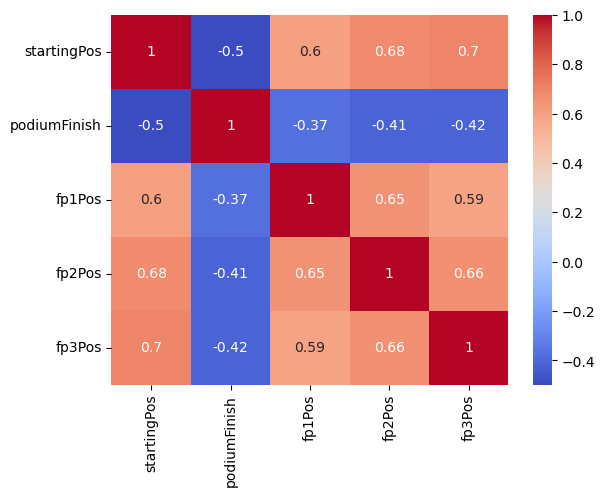

In [82]:
corr_matrix =df[['startingPos','podiumFinish','fp1Pos','fp2Pos','fp3Pos']].corr()
sns.heatmap(corr_matrix,annot = True, cmap='coolwarm')

`startingPos` & `podiumFinish` - Negative Correlation (low startingPos -> high chance of win)

`fp1Pos`,`fp2Pos`,`fp3Pos` & `startingPos` - Positive Correlation (low fpPos -> low startingPos)

`fp1Pos`,`fp2Pos`,`fp3Pos` & `podiumFinish` - Negative Correlation (low fpPos -> high chance of win)

## Model Training (LogisticRegression)

In [ ]:
dfLR = df

